<a href="https://colab.research.google.com/github/Panagiotis-Bosinas/Machine_Learning_Assignments/blob/main/Ergasia8_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ερώτημα 1 και 2

In [1]:
!unzip archive.zip

Archive:  archive.zip
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_100.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/Beagle/Beagle_27.jpg  
  inflating: dataset/Beagle/Beagle_28.jpg  
  inflating

## Ερώτημα 3

In [2]:
import os
import PIL
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Αρίθμηση των targets

In [3]:
class_names = sorted(os.listdir('dataset'))
class_ids = {label: i for i, label in enumerate(class_names)}
class_ids

{'Beagle': 0,
 'Boxer': 1,
 'Bulldog': 2,
 'Dachshund': 3,
 'German_Shepherd': 4,
 'Golden_Retriever': 5,
 'Labrador_Retriever': 6,
 'Poodle': 7,
 'Rottweiler': 8,
 'Yorkshire_Terrier': 9}

Μετατροπή των εικόνων

In [4]:
image_size = (64, 64)

inputs = []
targets = []
for label in class_names:
    for filename in os.listdir(f'dataset/{label}'):
        filepath = f'dataset/{label}/{filename}'
        img = PIL.Image.open(filepath).convert('RGB').resize(image_size)
        inputs.append(img)
        targets.append(class_ids[label])
inputs = np.float32(inputs)
targets = np.int32(targets)

inputs.shape, targets.shape

((967, 64, 64, 3), (967,))

In [5]:
inputs.dtype

dtype('float32')

## Ερώτημα 4

In [6]:
seed = 0

tf.random.set_seed(seed=seed)
np.random.seed(seed=seed)
random.seed(seed)

In [7]:
test_size = 0.3
stratify = [targets]

x_train, x_test, y_train, y_test = train_test_split(
    inputs,
    targets,
    test_size=0.3,
    stratify=targets,
    random_state=seed
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((676, 64, 64, 3), (676,), (291, 64, 64, 3), (291,))

Κανονικοποίηση των δεδομένων και one hot encoding

In [8]:
x_train /= 255.0
x_test /= 255.0
y_train = np.eye(len(class_names))[y_train]
y_test = np.eye(len(class_names))[y_test]

y_train.shape, y_test.shape

((676, 10), (291, 10))

In [9]:
input_size = x_train.shape[1:]
output_size = len(class_names)

mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=64, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='MLP')
mlp.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       786,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 791,306 (3.02 MB)

 Trainable params: 791,306 (3.02 MB)

 Non-trainable params: 0 (0.00 B)

Το MLP έχει 4 layers. Το flatten layer με είσοδο πίνακα μεγέθους 64x64x3 και έξοδο ένα αντίστοιχο διάνυσμα 1x12288, το πρώτο Dense layer που δέχεται ως είσοδο το διάνυσμα 1x12288 και έχει 64 νευρώνες με αντίστοιχες εξόδους, το δεύτερο dense layer που έχει επίσης 64 νευρώνες με 64 εισόδους και εξόδους και το τελευταίο dense layer που έχει 10 νευρώνες και παράγει τις εξόδους του multiclass προβλήματος. Τα πρώτα δύο dense layers έχουν συνάρτηση ενεργοποίησης την ReLU ενώ το τελευταίο έχει την Softmax

## Ερώτημα 5

In [10]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
mlp.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
batch_size = 32
epochs = 30

history = mlp.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.1101 - loss: 3.4111 - val_accuracy: 0.2027 - val_loss: 2.1744
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2114 - loss: 2.1569 - val_accuracy: 0.2749 - val_loss: 1.9813
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3688 - loss: 1.8512 - val_accuracy: 0.4124 - val_loss: 1.7173
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4694 - loss: 1.6415 - val_accuracy: 0.4261 - val_loss: 1.5901
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5444 - loss: 1.4396 - val_accuracy: 0.4467 - val_loss: 1.4946
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6048 - loss: 1.2935 - val_accuracy: 0.5361 - val_loss: 1.3547
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6403 - loss: 1.1350 - val_accuracy: 0.6048 - val_loss: 1.2311
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7315 - loss: 0.9738 - val_accuracy: 0.6392 - v

## Ερώτημα 6

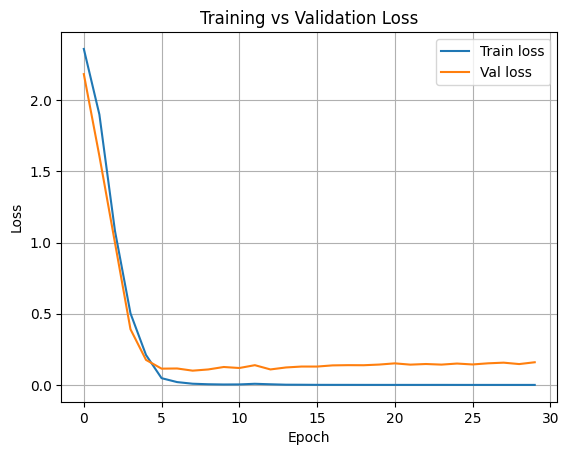

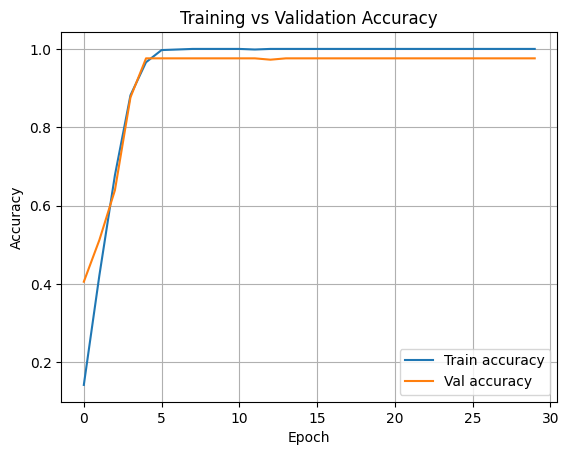

In [15]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Το μοντέλο επιτυγχάνει πολύ καλή ακρίβεια σε 30 επαναλήψεις και γενικεύει καλά χωρίς να κάνει overfitting.

## Ερώτημα 7

In [16]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='CNN')
cnn.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │     1,722,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,733,226 (6.61 MB)

 Trainable params: 1,733,226 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

Το CNN έχει 6 layers, ένα conv2d layer το οποίο λαμβάνει ως είσοδο τις εικόνες και εξάγει χαρακτηριστικά από αυτές με φίλτρο, με έξοδο 31x31x32, ένα dropout layer που απενεργοποιεί ένα τυχαίο 20% των νευρώνων κάθε φορά στην εκπαίδευση με έξοδο 31x31x32,ένα δεύτερο conv2d layer για την εξαγωγή πιο σύνθετων χαρακτηριστικών με έξοδο 29x29x32, ένα flatten layer το οποίο μετατρέπει την έξοδο του προηγούμενου layer σε διάνυσμα 1x26912, ένα dense layer με 64 νευρώνες και το τελευταίο dense layer με 10 νευρώνες.Τα conv2d και το πρώτο dense layer χρησιμοποιούν ως συνάρτηση ενεργοποίησης την ReLU ενώ το τελευταίο την Softmax για το multiclass πρόβλημα.

In [17]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.1022 - loss: 2.5280 - val_accuracy: 0.1924 - val_loss: 2.2736
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.1382 - loss: 2.2204 - val_accuracy: 0.3299 - val_loss: 2.0370
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.3932 - loss: 1.8934 - val_accuracy: 0.5704 - val_loss: 1.5045
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.6184 - loss: 1.2149 - val_accuracy: 0.6976 - val_loss: 1.0060
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.8398 - loss: 0.6146 - val_accuracy: 0.8282 - val_loss: 0.5640
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9294 - loss: 0.2776 - val_accuracy: 0.9416 - val_loss: 0.2966
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.9756 - loss: 0.1517 - val_accuracy: 0.9553 - val_loss: 0.1749
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.9918 - loss: 0.0651 - val_accuracy: 0.

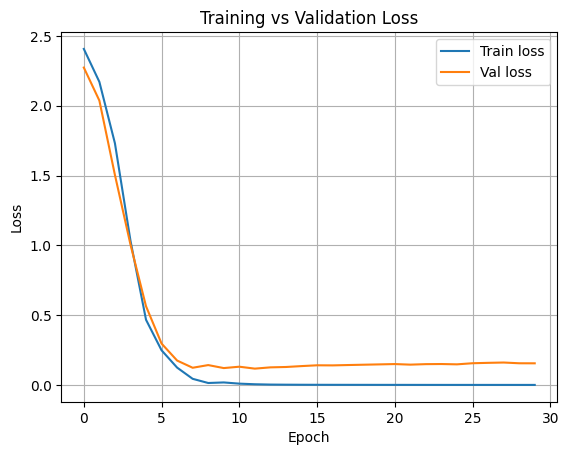

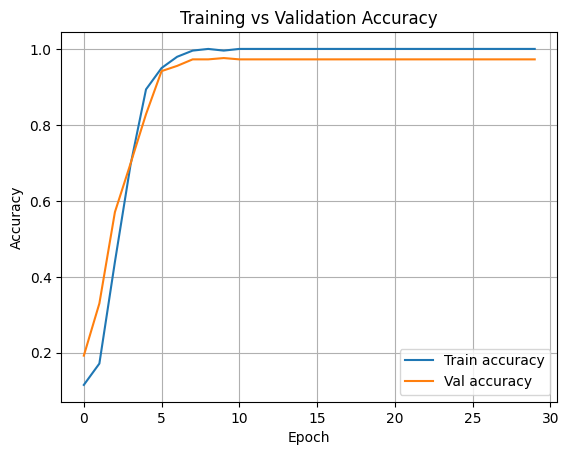

In [18]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Το CNN επιτυγχάνει πολύ πιο γρήγορα την υψηλότερη απόδοσή του, η οποία είναι μεγαλύτερη από αυτήν του MLP. Το CNN αποδίδει καλύτερα αφενός γιατί εμπεριέχει τα layers conv2d που του επιτρέπουν να αναγνωρίζει μοτίβα και χαρακτηριστικά στις εικόνες και αφετέρου γιατί εφαρμόζει dropout που αναγκάζει όλους τουςς νευρώνες να συμμετέχουν και έτσι μειώνεται το overfitting.

## Ερώτημα 8

Θα κάνουμε grid search για hyperparameter tuning επιλέγοντας τιμές για τον αριθμό των φίλτρων, τον αριθμό των νευρώνων των dense layers, το dropout και το learning rate. Επίσης, εφαρμόζουμε batch normalization πριν από κάθε ReLU activation. Η διαδικασία γίνεται για 10 επαναλήψεις κάθε φορά, ώστε να μειωθεί ο χρόνος εκτέλεσης.

In [19]:
filters1 = [32, 64]
filters2 = [32, 64]
dense_units = [64, 128]
dropout = [0.2, 0.3]
learning_rates = [1e-3, 1e-4]

best_val_acc = 0
best_params = None
best_model = None

for f1 in filters1:
    for f2 in filters2:
        for du in dense_units:
            for dr in dropout:
                for lr in learning_rates:
                    print(f"Training with filters1={f1}, filters2={f2}, dense_units={du}, dropout={dr}, lr={lr}")

                    cnn2 = tf.keras.Sequential([
                        tf.keras.layers.Input(shape=input_size),

                        tf.keras.layers.Conv2D(filters=f1, kernel_size=3, strides=2, use_bias=False),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Activation('relu'),
                        tf.keras.layers.Dropout(rate=dr),

                        tf.keras.layers.Conv2D(filters=f2, kernel_size=3, strides=1, use_bias=False),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Activation('relu'),

                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(units=du, activation='relu'),
                        tf.keras.layers.Dense(units=output_size, activation='softmax')
                    ])

                    cnn2.compile(
                        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                        loss='categorical_crossentropy',
                        metrics=['accuracy']
                    )

                    history = cnn2.fit(
                        x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=10, batch_size=32, verbose=0
                    )

                    val_acc = history.history['val_accuracy'][-1]
                    if val_acc > best_val_acc:
                        best_val_acc = val_acc
                        best_params = (f1, f2, du, dr, lr)
                        best_model = cnn2

print("Best validation accuracy:", best_val_acc)
print("Best parameters:", best_params)

Training with filters1=32, filters2=32, dense_units=64, dropout=0.2, lr=0.001
Training with filters1=32, filters2=32, dense_units=64, dropout=0.2, lr=0.0001
Training with filters1=32, filters2=32, dense_units=64, dropout=0.3, lr=0.001
Training with filters1=32, filters2=32, dense_units=64, dropout=0.3, lr=0.0001
Training with filters1=32, filters2=32, dense_units=128, dropout=0.2, lr=0.001
Training with filters1=32, filters2=32, dense_units=128, dropout=0.2, lr=0.0001
Training with filters1=32, filters2=32, dense_units=128, dropout=0.3, lr=0.001
Training with filters1=32, filters2=32, dense_units=128, dropout=0.3, lr=0.0001
Training with filters1=32, filters2=64, dense_units=64, dropout=0.2, lr=0.001
Training with filters1=32, filters2=64, dense_units=64, dropout=0.2, lr=0.0001
Training with filters1=32, filters2=64, dense_units=64, dropout=0.3, lr=0.001
Training with filters1=32, filters2=64, dense_units=64, dropout=0.3, lr=0.0001
Training with filters1=32, filters2=64, dense_units=12

Επιλέγουμε το καλύτερο από τα μοντέλα και εκπαιδεύουμε για 30 επαναλήψεις.

In [22]:
best_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = best_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=30,
    batch_size=32)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 213ms/step - accuracy: 1.0000 - loss: 0.0129 - val_accuracy: 0.6289 - val_loss: 1.2921
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.7251 - val_loss: 1.0397
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.7182 - val_loss: 0.9254
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 1.0000 - loss: 7.6407e-04 - val_accuracy: 0.8144 - val_loss: 0.6017
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - accuracy: 1.0000 - loss: 4.6695e-04 - val_accuracy: 0.8694 - val_loss: 0.4750
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 1.0000 - loss: 3.0542e-04 - val_accuracy: 0.9107 - val_loss: 0.3884
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 1.0000 - loss: 2.9657e-04 - val_accuracy: 0.9622 - val_loss: 0.2866
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 197ms/step - accuracy: 1.0000 - loss: 2.3163e-0

Πράγματι, βλέπουμε ότι η ακρίβεια βελτιώθηκε ελάχιστα.